https://www.visualcrossing.com/weather/weather-data-services#

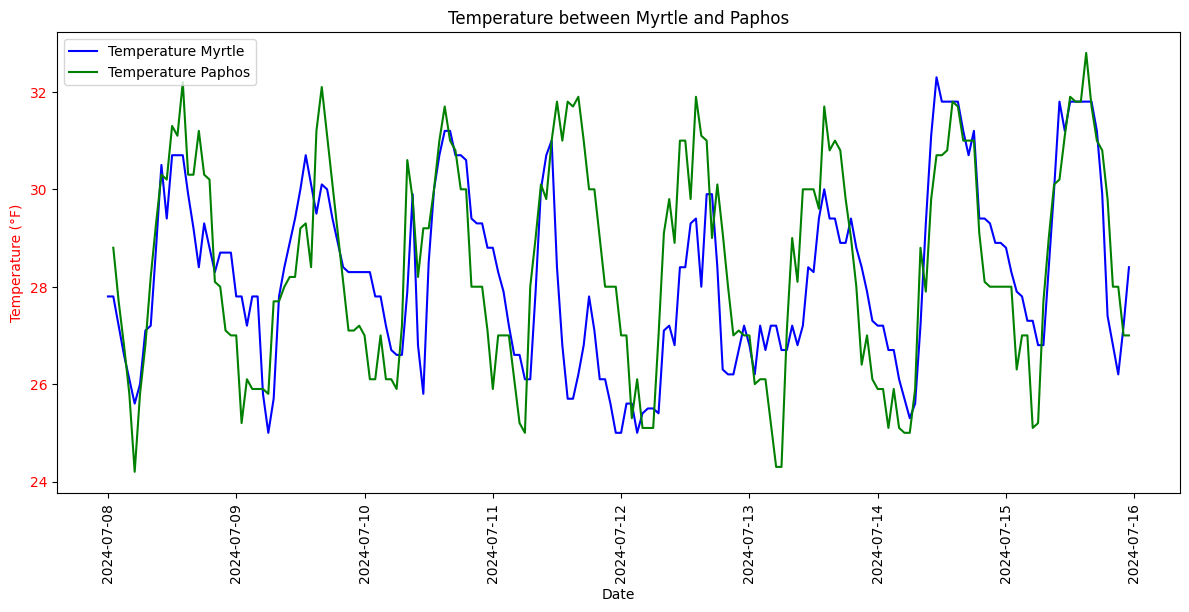

In [117]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the calculate_heat_index function
def calculate_heat_index(temp_f, humidity):
    """
    Calculate the heat index given the temperature in Fahrenheit and relative humidity.

    Parameters:
    temp_f (float): Temperature in degrees Fahrenheit.
    humidity (float): Relative humidity in percentage.

    Returns:
    float: Heat index in degrees Fahrenheit.
    """
    
    temp_f = (temp_f * 9/5) + 32
    
    # Coefficients for the heat index formula
    c1 = -42.379
    c2 = 2.04901523
    c3 = 10.14333127
    c4 = -0.22475541
    c5 = -6.83783 * (10**-3)
    c6 = -5.481717 * (10**-2)
    c7 = 1.22874 * (10**-3)
    c8 = 8.5282 * (10**-4)
    c9 = -1.99 * (10**-6)

    # Calculate heat index
    heat_index = (c1 + (c2 * temp_f) + (c3 * humidity) + (c4 * temp_f * humidity) +
                  (c5 * temp_f**2) + (c6 * humidity**2) + (c7 * temp_f**2 * humidity) +
                  (c8 * temp_f * humidity**2) + (c9 * temp_f**2 * humidity**2))

    return heat_index

# Read data from CSV files
df_myrtle = pd.read_csv('myrtle.csv', parse_dates=['datetime'], index_col='datetime')
df_paphos = pd.read_csv('paphos.csv', parse_dates=['datetime'], index_col='datetime')



# Apply the calculate_heat_index function to each DataFrame
df_myrtle['heat_index'] = df_myrtle.apply(lambda row: calculate_heat_index(row['temp'], row['humidity']), axis=1)
df_paphos['heat_index'] = df_paphos.apply(lambda row: calculate_heat_index(row['temp'], row['humidity']), axis=1)

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot temperature for both locations
ax1.plot(df_myrtle.index, df_myrtle['temp'], 'b', label='Temperature Myrtle')
ax1.plot(df_paphos.index, df_paphos['temp'], 'g', label='Temperature Paphos')
ax1.set_xlabel('Date')
ax1.set_ylabel('Temperature (°F)', color='r')
ax1.tick_params(axis='y', labelcolor='r')

 

# Rotate x-ticks
plt.xticks(rotation=90)

# Add legends
fig.tight_layout()
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('Temperature between Myrtle and Paphos')
plt.show()


 

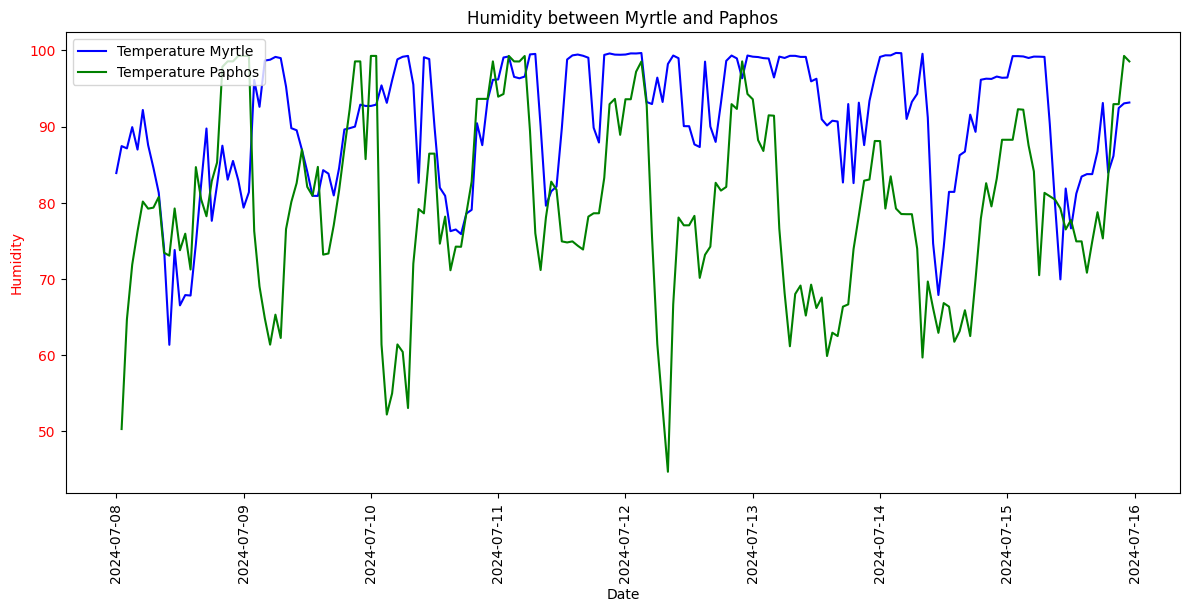

In [121]:
# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot temperature for both locations
ax1.plot(df_myrtle.index, df_myrtle['humidity'], 'b', label='Temperature Myrtle')
ax1.plot(df_paphos.index, df_paphos['humidity'], 'g', label='Temperature Paphos')
ax1.set_xlabel('Date')
ax1.set_ylabel('Humidity', color='r')
ax1.tick_params(axis='y', labelcolor='r')

 

# Rotate x-ticks
plt.xticks(rotation=90)

# Add legends
fig.tight_layout()
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('Humidity between Myrtle and Paphos')
plt.show()


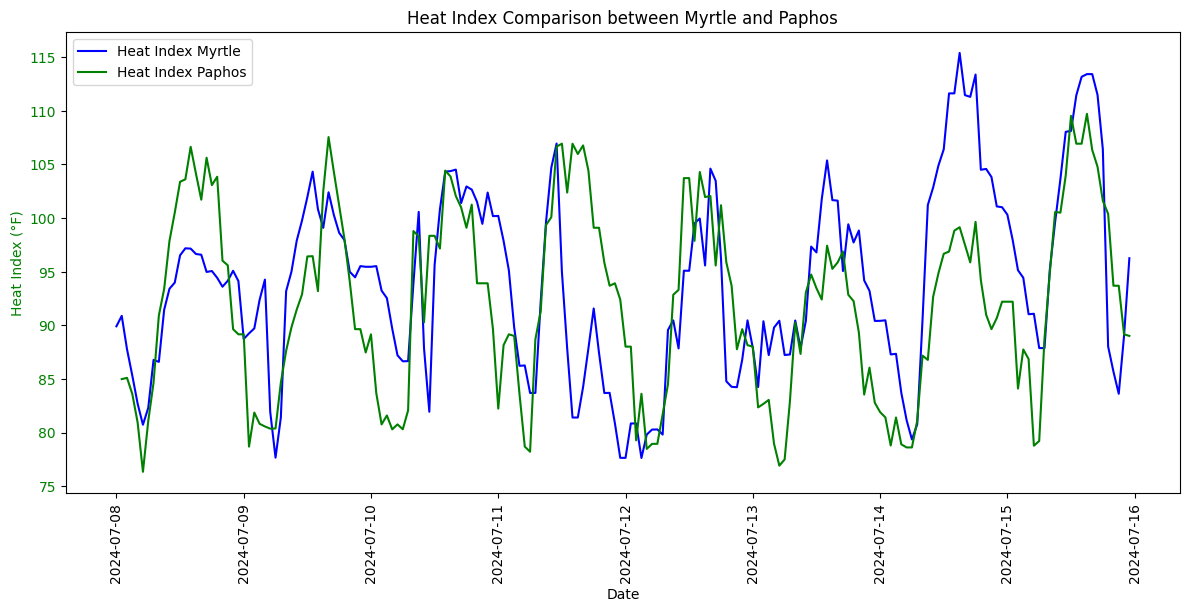

In [114]:


# Plotting Heat Index
fig, ax = plt.subplots(figsize=(12, 6))

# Plot heat index for both locations
ax.plot(df_myrtle.index, df_myrtle['heat_index'], 'b', label='Heat Index Myrtle')
ax.plot(df_paphos.index, df_paphos['heat_index'], 'g', label='Heat Index Paphos')
ax.set_xlabel('Date')
ax.set_ylabel('Heat Index (°F)', color='g')
ax.tick_params(axis='y', labelcolor='g')

# Rotate x-ticks
plt.xticks(rotation=90)

# Add legends
fig.tight_layout()
ax.legend(loc='upper left')

plt.title('Heat Index Comparison between Myrtle and Paphos')
plt.show()